<a href="https://colab.research.google.com/github/Kdonghs/dataAnalysis/blob/main/finalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.indexes import numeric
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Credit Card customers DataSet
- this dataset is from kaggle
- this dataset include the age, salary, marital status, credit card limit, credit card category, etc. of credit card users.
- The previously given Naive_Bayes value,ClientNumber is drop.

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/Kdonghs/dataAnalysis/main/BankChurners.csv')
df.dropna()
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'CLIENTNUM'],axis = 1,inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# data selection
- Categorize data into categories

In [97]:
categoricalDF = df.select_dtypes(include='object')
numericDf = df.select_dtypes(include='float64')


# Visualizing Categorical Features

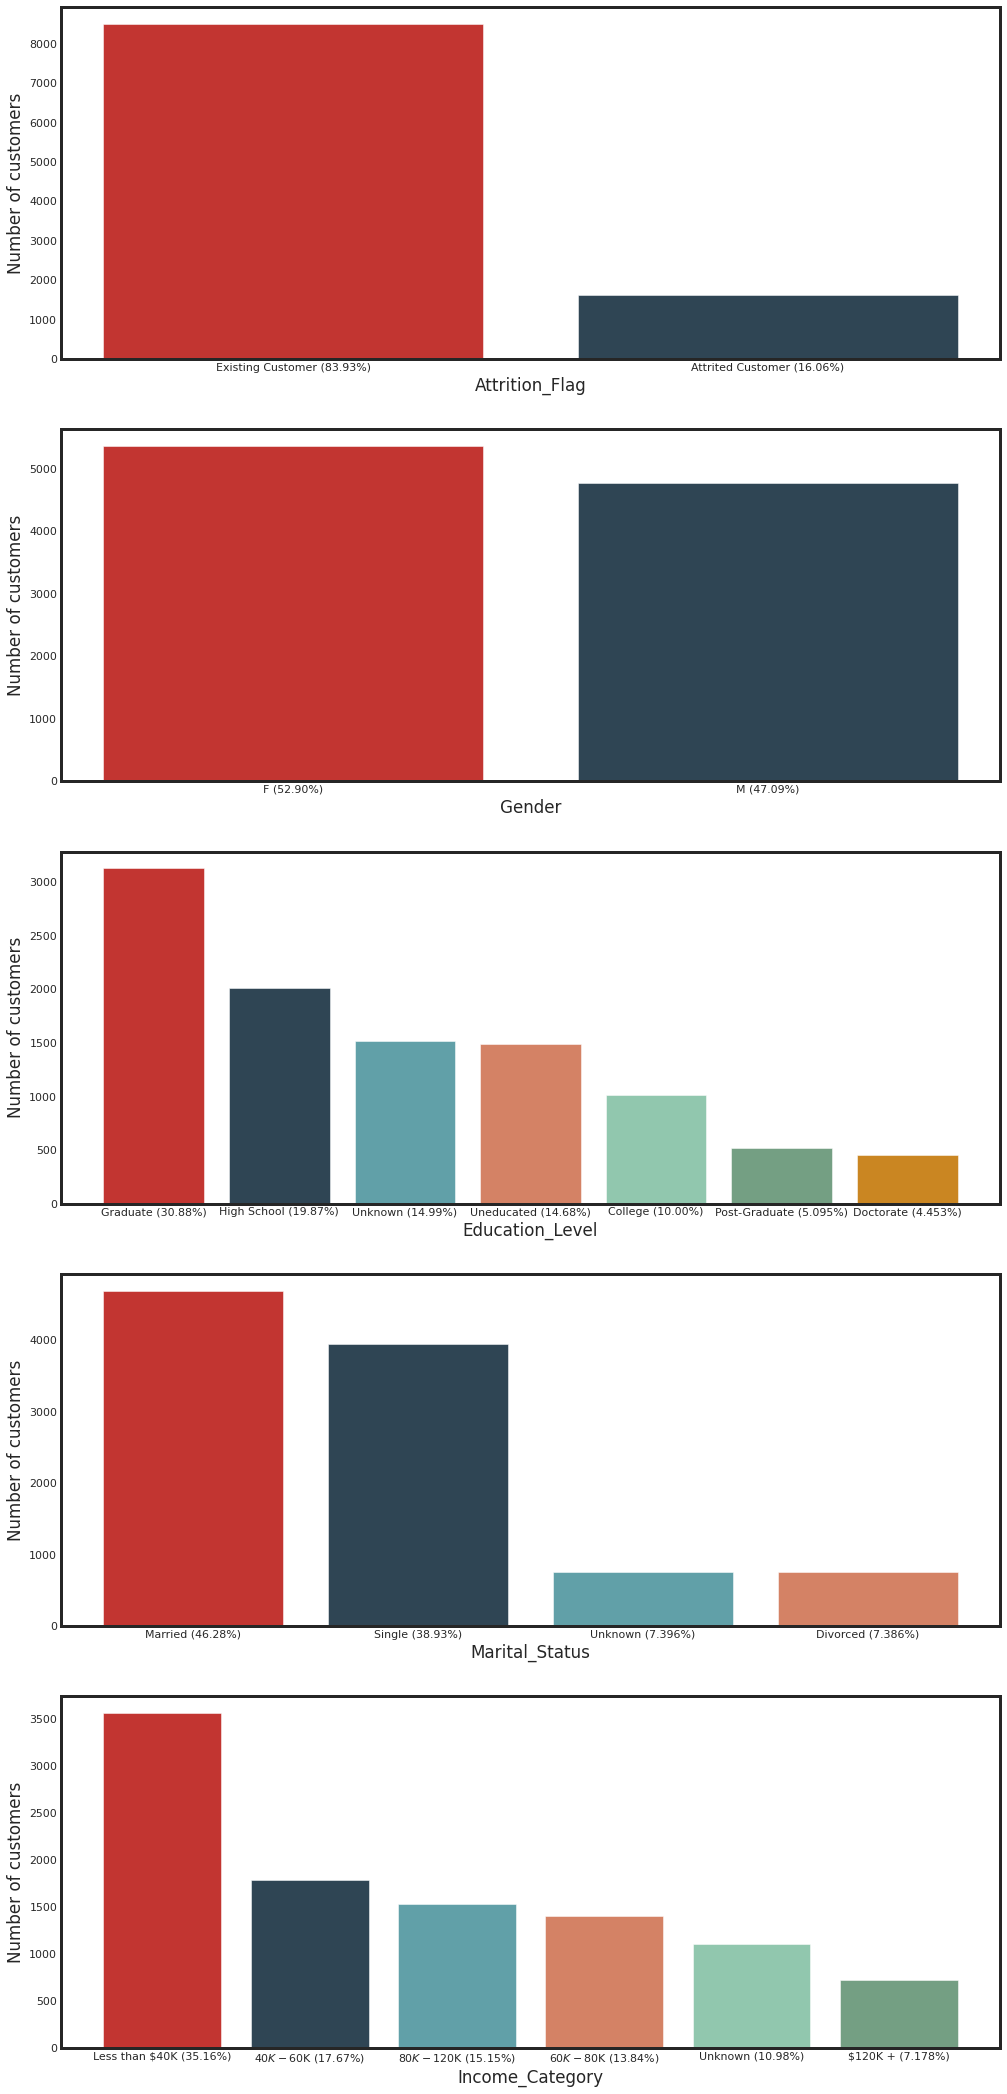

In [115]:
fig = plt.figure(figsize=(15, 35))
sns.set_style("white")

Categorical=df[['Attrition_Flag','Gender','Education_Level', 'Marital_Status', 'Income_Category']]
colors = ['#c23531','#2f4554', '#61a0a8', '#d48265', '#91c7ae','#749f83', '#ca8622', '#bda29a','#6e7074', '#546570', '#c4ccd3']

for i in range(5):
  count = Counter(df[Categorical.columns[i]])
  count = pd.Series(count).sort_values(ascending=False)
  labels = []
  for j in count.keys():
    labels.append(j + ' (' + str(count[j]/len(df[Categorical.columns[i]])*100)[:5] + '%)')
  axi=fig.add_subplot(5,1,i+1)
  axi=plt.bar(labels, count,color = colors)
  axi=plt.xlabel(Categorical.columns[i])
  axi=plt.ylabel('Number of customers')

count = Counter(df['Education_Level'])
count = pd.Series(count).sort_values(ascending=False)
labels = []

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


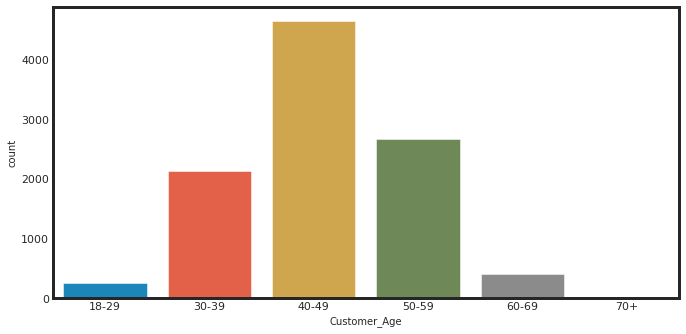

In [154]:
bins = [18, 30, 40, 50, 60, 70, 110]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
age = pd.cut(df['Customer_Age'], bins, labels = labels,include_lowest = True)
plt.figure(figsize=(10,5))
sns.countplot(age)

# Visualize numeric data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

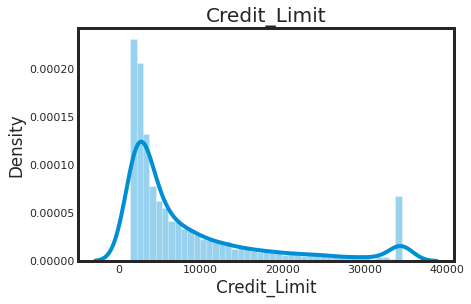

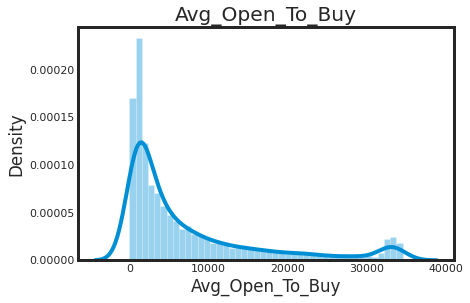

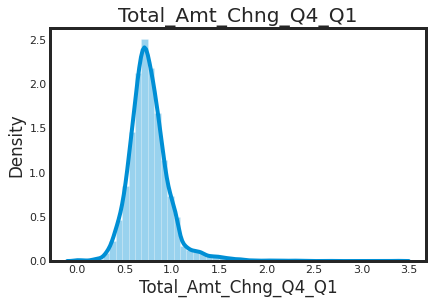

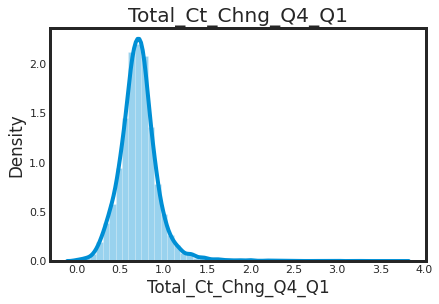

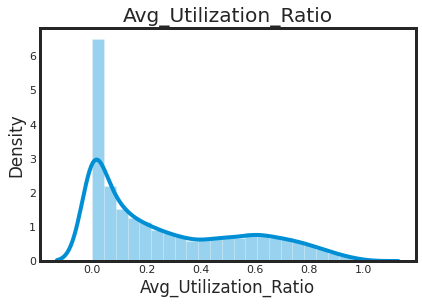

In [99]:
continous_features = numericDf.columns.to_list()

for cont_feature in continous_features: 
    plt.figure()
    plt.title(cont_feature)
    ax = sns.distplot(df[cont_feature])

# Analysis of correlation coefficient.
- Correlation analysis is performed by replacing the numeric data type with numerical data.


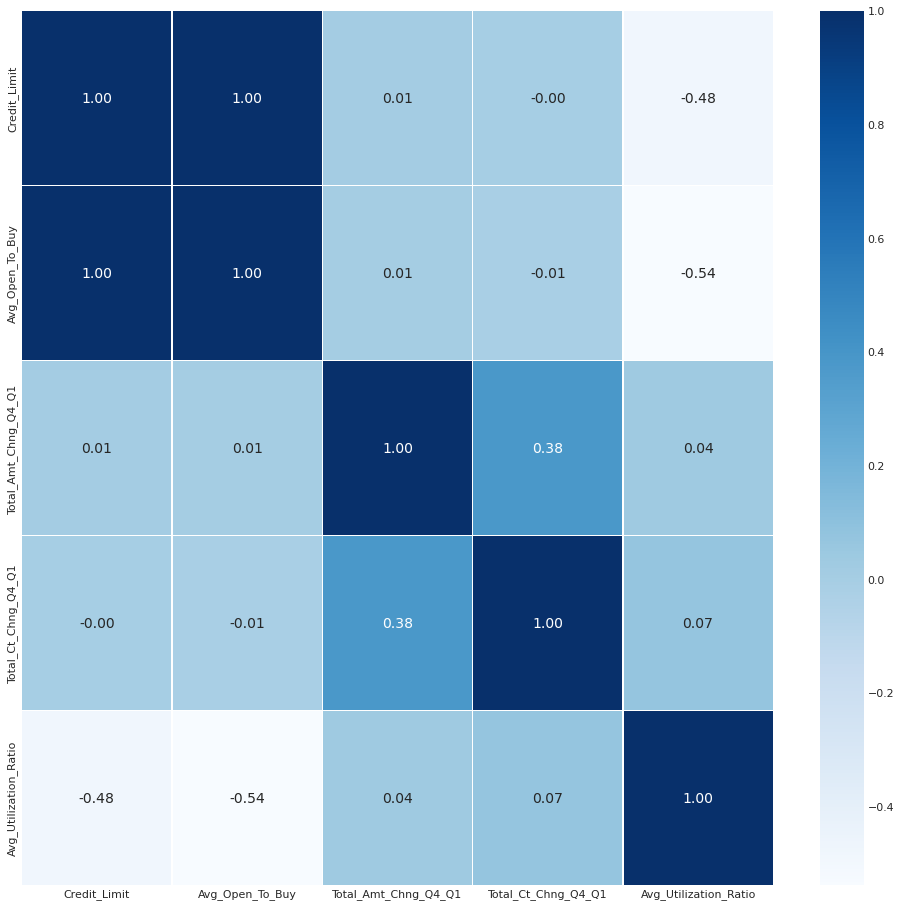

In [100]:
plt.figure(figsize=(15,15))
sns.heatmap(data = numericDf.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Scatterplots and trendlines for numeric data

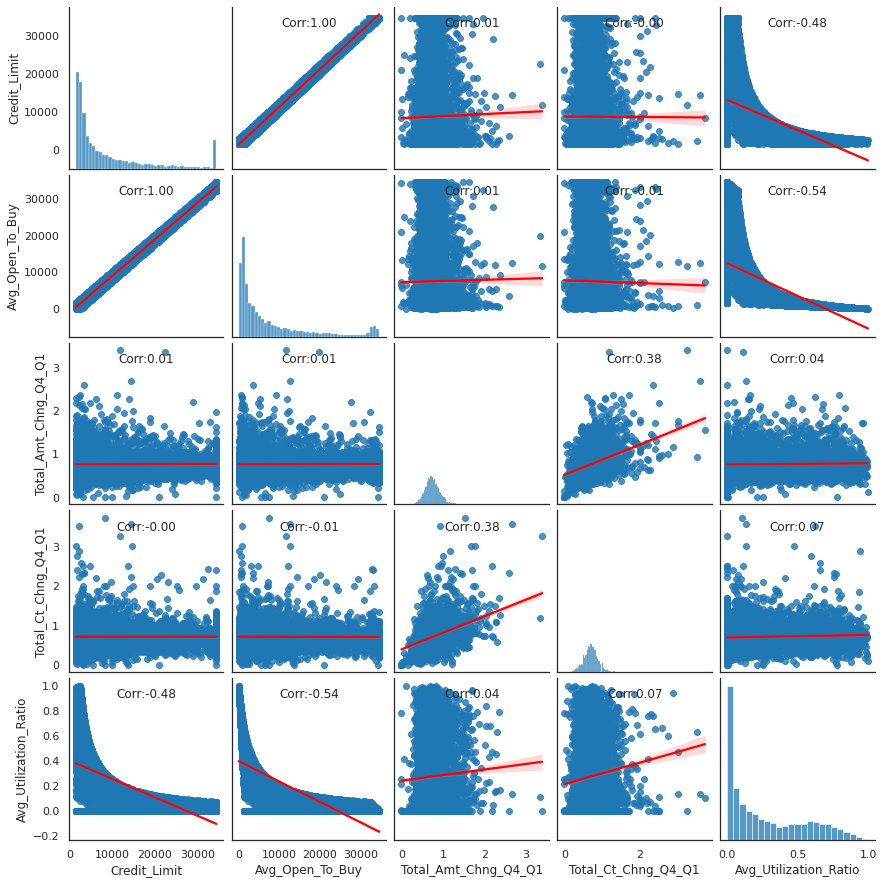

In [ ]:
mask = np.triu(np.ones_like(numericDf, dtype=bool))    
g = sns.pairplot(numericDf, kind='reg', plot_kws={'line_kws':{'color':'red'}})

corrValue = np.array(numericDf.corr())
for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue.flatten())):  
 if(cv<1):
   ax.text(0.5,0.9,"Corr:{:.2f}".format(cv),horizontalalignment='center',verticalalignment='center',transform = ax.transAxes)

plt.show()

# Remove outliers

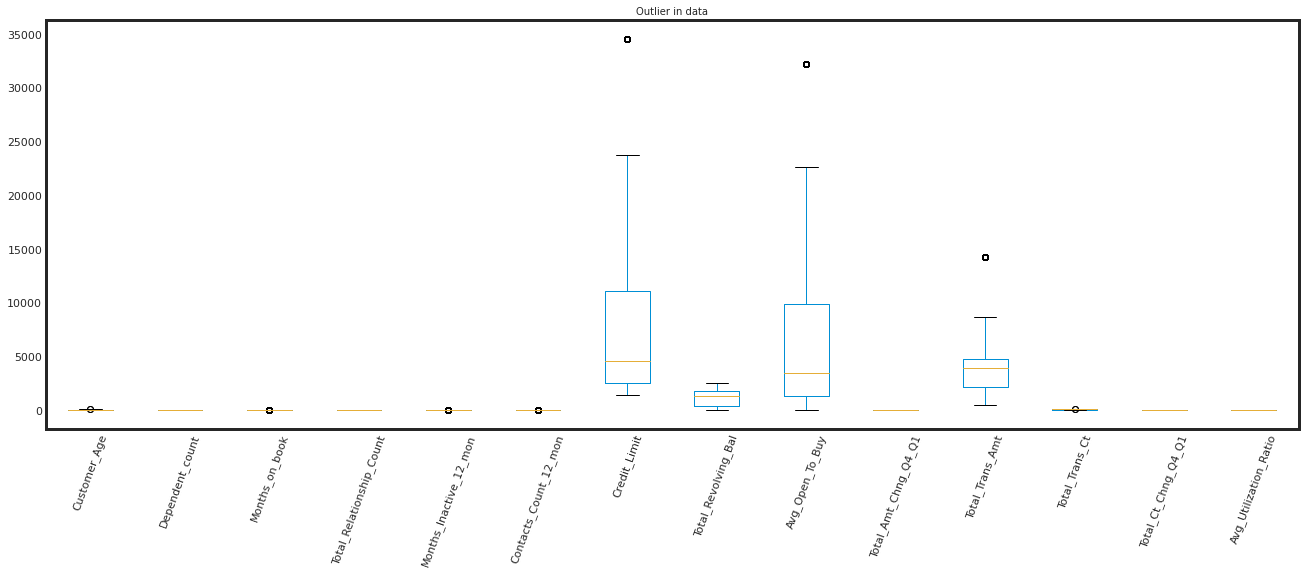

In [179]:
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

Text(0.5, 1.0, 'Outlier treated in df')

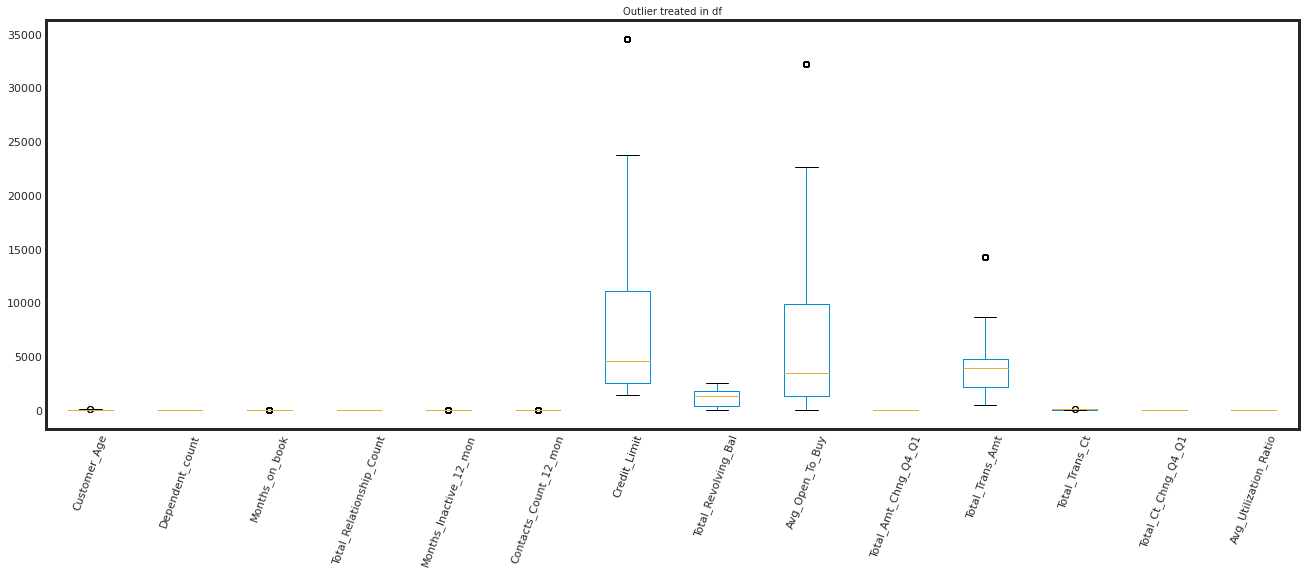

In [183]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = numericDf.columns
for i in df[outlier_list]:
    df[i]=treat_outlier(df[i])
    
outlier= df.plot(kind='box',figsize=(20,7))
plt.xticks(rotation=70)
plt.title('Outlier treated in df')

# data Preprocessing
- Converts bool and object data types to categorical data types
- Label the converted categorical data.
- y is the labeling 'Attrition_Flag'
- X is the rest of the data except for 'Attrition_Flag'

In [143]:
cat_types = ['bool','object']
data_clean = df.copy()
data_clean[data_clean.select_dtypes(cat_types).columns] = data_clean.select_dtypes(cat_types).apply(lambda x: x.astype('category'))
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [144]:
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map(codes)

y = data_clean['Attrition_Flag']
X = data_clean.drop('Attrition_Flag',errors='ignore',axis=1)

In [145]:
for col in X.select_dtypes('category').columns.to_list():
    print(col + ': '+ str(X[col].cat.categories.to_list()))
    
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = X.select_dtypes('category').columns.to_list()
for feature in features_to_encode:
    X = encode_and_bind(X, feature)
    
X.info()

Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  f

# data Tranformation
- splitting preprocessing data
- when splitting data, set stratify to be similar to the original data
- modeling is carried out in the Supervised Learning(Logistics Regression, kNN, Naïve Bayes, Decision Tree) method.

In [146]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, shuffle= True, stratify = y)

# fitting the training data(LogisticRegression)
log = LogisticRegression()
log.fit(X_train,y_train)
predictions1 = log.predict(X_test)

# fitting the training data(kNN)
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
predictions2 = knn.predict(X_test)

# fitting the training data(Naïve Bayes)
NB = GaussianNB()
NB.fit(X_train,y_train)
predictions3 = NB.predict(X_test)

# fitting the training data(Decision Tree)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions4 = dt.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# model Evaluation
- Evaluate using r2_score, mean_squared_error, classification_report(precision, recall, f1-score, support, etc).

In [147]:
print('\nLogisticRegression')
score=r2_score(y_test,predictions1)
print('r2 socre is %.4f'%score)
print('mean_squared error of is %.2f'%np.sqrt(mean_squared_error(y_test, predictions1)))
print(classification_report(y_test,predictions1))

print("\nKNN")
score=r2_score(y_test,predictions2)
print('r2 socre is %.4f'%score)
print('mean_squared error of is %.2f'%np.sqrt(mean_squared_error(y_test, predictions2)))
print(classification_report(y_test,predictions2))

print('\nNaive Bays')
score=r2_score(y_test,predictions3)
print('r2 socre is %.4f'%score)
print('mean_squared error of is %.2f'%np.sqrt(mean_squared_error(y_test, predictions3)))
print(classification_report(y_test,predictions3))

print('\nDecision Tree')
score=r2_score(y_test,predictions4)
print('r2 socre is %.4f'%score)
print('mean_squared error of is %.2f'%np.sqrt(mean_squared_error(y_test, predictions4)))
print(classification_report(y_test,predictions4))


LogisticRegression
r2 socre is 0.0948
mean_squared error of is 0.35
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.70      0.42      0.52       325

    accuracy                           0.88      2026
   macro avg       0.80      0.69      0.73      2026
weighted avg       0.87      0.88      0.86      2026


KNN
r2 socre is 0.2964
mean_squared error of is 0.31
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1701
           1       0.81      0.54      0.65       325

    accuracy                           0.91      2026
   macro avg       0.86      0.76      0.80      2026
weighted avg       0.90      0.91      0.90      2026


Naive Bays
r2 socre is 0.2744
mean_squared error of is 0.31
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1701
           1       0.81      0.51      0.63       325

# find the optimal n_neighbors of kNN
- iteratively modeling kNN to find the optimal value
- It shows an average level, but shows the highest accuracy at 13.

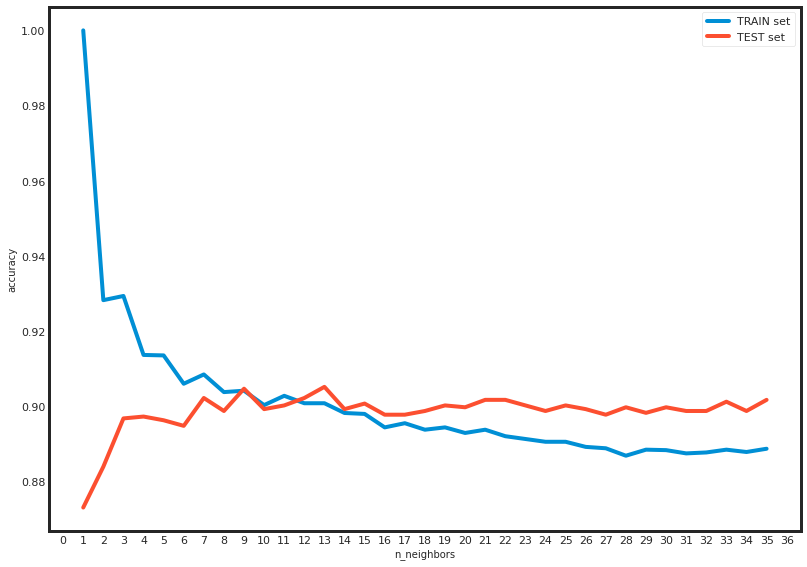

In [148]:
train_acc = []
test_acc = []

for n in range(1,36):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append((prediction==y_test).mean())
plt.figure(figsize=(12, 9))
plt.plot(range(1, 36), train_acc, label='TRAIN set')
plt.plot(range(1, 36), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 37, step=1))
plt.legend()